# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Ole Quiring

Datum: 18.11.23

Gruppe: 48

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Inwiefern kann man die Wärmekapazität eines Behälters anhand von Sensoren auslesen und mit python berechnen.

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/picture_231010_Beispielbild_Tasse_Auswertung.jpg" width="800">

## Versuchsauswertung

In [6]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [7]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
pathh5="h5stuff/h5stuff.h5"

# DONE #

In [8]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py

dataset = h5py.File(pathh5, "r+")
# DONE #

#### (ii) Daten ploten

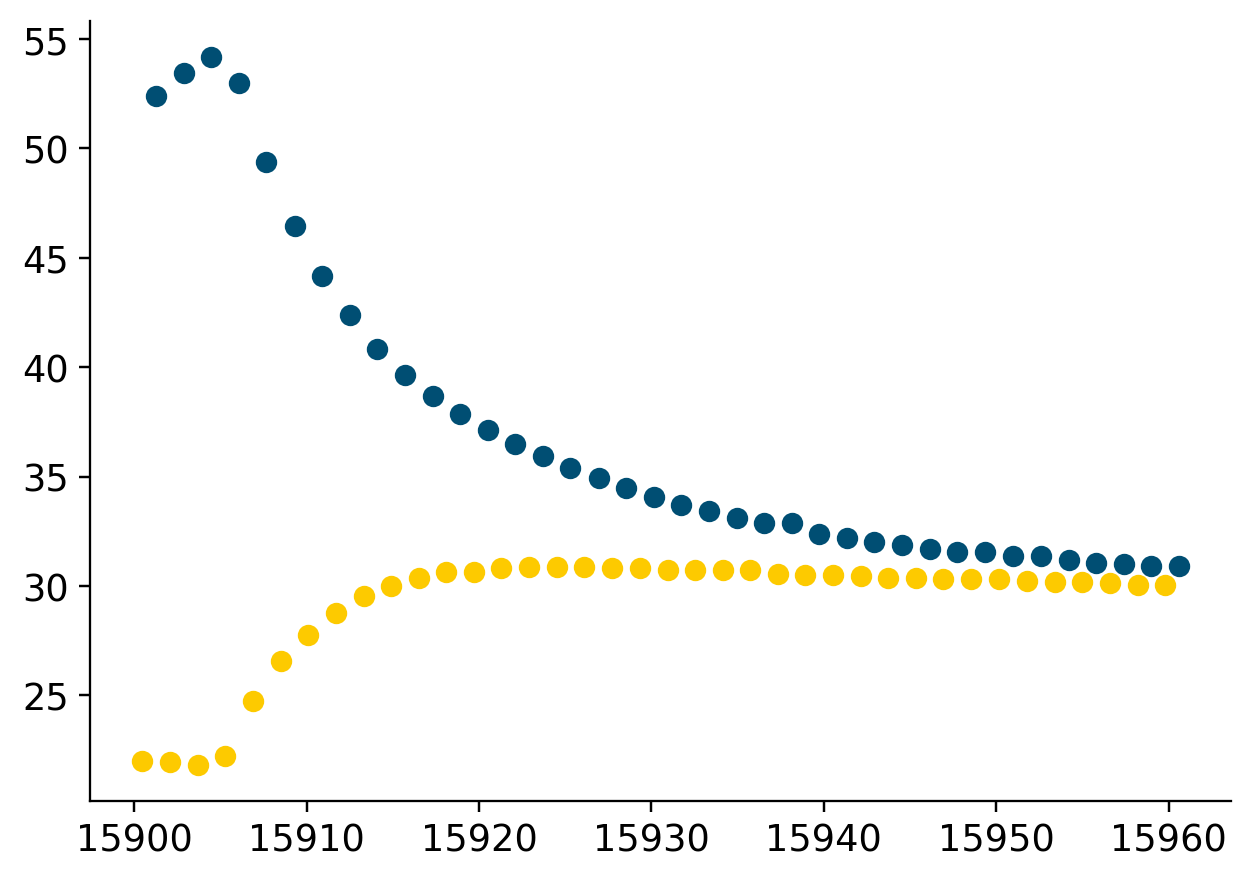

In [37]:
# TODO: Use the temperature and time data for plotting
temp1 = []
time1 = []
temp2 = []
time2 = []
for k, current in enumerate(dataset['RawData']):
    for content in dataset["RawData"][current]:
        for i, actual_contents in enumerate(dataset['RawData'][current][content]):
            if k == 0:
                if content == 'time_stamp':
                    time1.append(actual_contents[0])
                    continue
                temp1.append(actual_contents[0])
            elif k == 1:
                if content == 'time_stamp':
                    time2.append(actual_contents[0])
                    continue
                temp2.append(actual_contents[0])
plt.scatter(time2,temp2)

plt.scatter(time1,temp1)
#print(time1)

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [35]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
import json
pathinfo="h5stuff/probe_heat_capacity_1ee84816-8769-6222-94c3-af6e7dedb2fd.json"
datainfo =None

with open(pathinfo, 'r') as file:
    datainfo=json.load(file),                    

mass_hot_water = datainfo[0]["hot_water"]["mass"]
print(mass_hot_water)
mass_cold_water = datainfo[0]["cold_water"]["mass"]
print(mass_cold_water)
# DONE #

0.05
0.1


#### (iV) Anfangs- und Endwert der Temperatur

In [49]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
madd=float(mass_hot_water)
mcup=float(mass_cold_water)
TM=float((temp1[-1]+temp2[-1])/2)
T2=float(temp2[1])
T1=float(temp1[1])


# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [50]:
# TODO: Calculate heat capacity of the calorimeter

Capacity=(madd*water_heat_capa*(T2-TM)/(TM-T1))-mcup*water_heat_capa

# DONE #

0.14187591240875913


#### (Vi) Ergebnis

In [52]:
# TODO: Print result
print("the heat capacity of the glass is",Capacity,"Joule per Kelvin")

# DONE #

the heat capacity of the glass is 0.14187591240875913 Joule per Kelvin


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Man kann anhand der Daten eine gute Abschätzung zur Wärmekapazität eines Behälters errechnen, jedoch bezweifle ich die Genauigkeit des Ergebnisses, da viele Faktoren das Ergebnis beeinflussen und viele Vereinfachungen getroffen werden müssen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Python und der Raspberry Pi sind gute Hilfen um Wissenschaftlich experimente durchführen und auswerten zu können. Leider habe ich keinen Referenzwert, um den Endwert zu vergleichen, jedoch hat die Messung und der Versuch mir geholfen Python genauer zu verstehen und wissenschaftlicher zu arbeiten.